In [624]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [625]:
df = pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [626]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# Lets see if the dataset has null values

In [627]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#No null values in the datset


In [628]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [629]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


# Data pre processing

1. Dropping the vaiable 'instant' as it is similar to a index number


In [630]:
df.drop('instant', axis=1, inplace=True)

2. we have a date column which we can split into day, month and year but we have those colums already so we can drop those as well

In [631]:
df.drop('dteday', axis=1, inplace=True)

similarly, the registered and casual can also be dropped as cnt is nothing but the aggregation of this two variables

In [632]:
df.drop('casual', axis=1, inplace=True)
df.drop('registered', axis=1, inplace=True)

Lets visualisize the df with pairplot

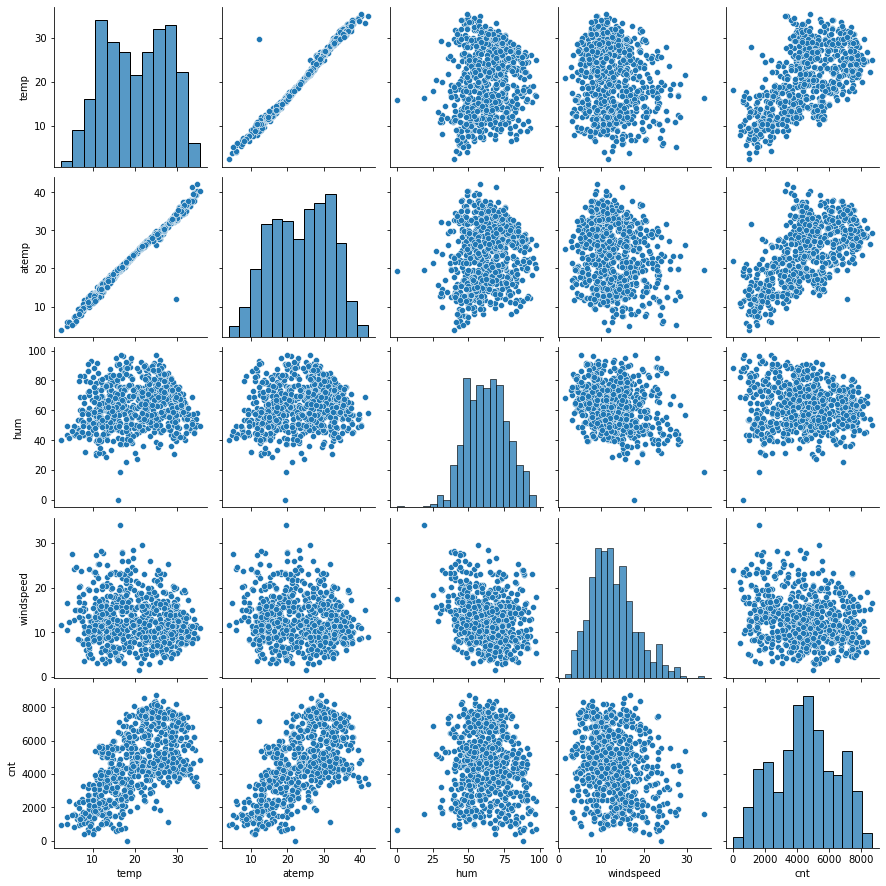

In [633]:
df_numeric = df[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]
sns.pairplot(df_numeric)
plt.show()

we see that 'cnt' has relation with temp and a temp, also we dont see much of extreme (outliers) values in the chart

<AxesSubplot:>

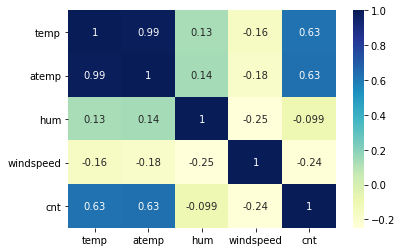

In [634]:
sns.heatmap(df_numeric.corr(), annot=True, cmap = "YlGnBu")

Wind speed and Hmidity has negative corelation

In [635]:
df['season'].value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

Season only has four values and we know that this is categorical in nature, so we can set dummy values for the columns


In [636]:
df['season']=df['season'].map({1:"spring", 2:"summer", 3:"fall", 4:"winter"})

In [637]:
df['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [638]:
seasons = pd.get_dummies(df['season'], drop_first=True)
seasons.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [639]:
df = pd.concat([df,seasons], axis=1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


Dropping the seasons column

In [640]:
df.drop('season', inplace=True, axis=1)

In [641]:
df['yr'].value_counts()

0    365
1    365
Name: yr, dtype: int64

converting months to category and assigning dummy values

In [642]:
df['mnth']=df['mnth'].map({1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"Jun", 7:"Jul", 8:"Aug", 9:"Sep", 10:"Oct",11:"Nov", 12:"Dec"})
df['mnth'].value_counts()

Jul    62
Jan    62
May    62
Mar    62
Aug    62
Oct    62
Dec    62
Nov    60
Jun    60
Apr    60
Sep    60
Feb    56
Name: mnth, dtype: int64

# converting week day to dummy variables

In [643]:
df['weekday']=df['weekday'].map({1:"Mon", 2:"Tue", 3:"Wed", 4:"Thu", 5:"Fri", 6:"Sat", 7:"Sun"})
df['weekday'].value_counts()

Tue    105
Mon    105
Thu    104
Sat    104
Fri    104
Wed    104
Name: weekday, dtype: int64

 next weather situation - we know that this is also a categorical from the data dictionary


In [644]:
df['weathersit'].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [645]:
df['weathersit']=df['weathersit'].map({1:"Clear", 2:"Mist", 3:"Snow", 4:"Rain"})
df['weathersit'].value_counts()

Clear    463
Mist     246
Snow      21
Name: weathersit, dtype: int64

In [646]:
months = pd.get_dummies(df['mnth'], drop_first=True)
weekday = pd.get_dummies(df['weekday'], drop_first=True)
weathersit = pd.get_dummies(df['weathersit'], drop_first=True)

now concat the dummy with main dataframe

In [647]:
# month - concat and drop
df = pd.concat([df,months], axis=1)
df.drop('mnth', inplace=True, axis=1)


In [648]:
# concatenating and dropping weekday
df = pd.concat([df,weekday], axis=1)
df.drop('weekday',  inplace=True, axis=1)

In [649]:
#concat and drop weathersituation
df = pd.concat([df,weathersit], axis=1)
df.drop('weathersit',  inplace=True, axis=1)

In [650]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Nov,Oct,Sep,Mon,Sat,Thu,Tue,Wed,Mist,Snow
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,0


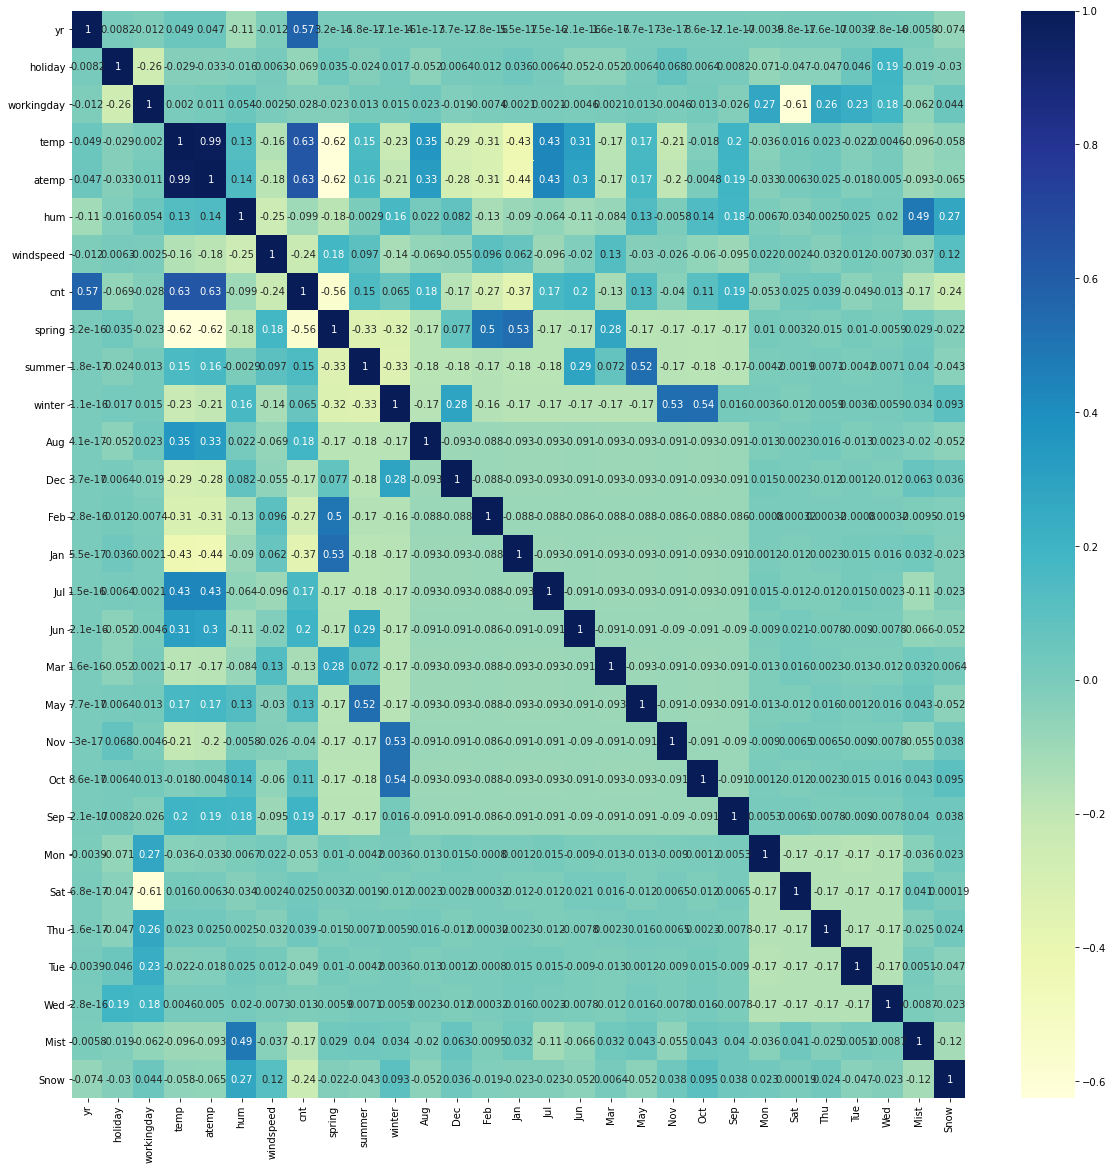

In [651]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap = "YlGnBu")
plt.show()

wee see that 'cnt' has good corelation with vaariables such as temp, atemp, sep, oct, may, jun , jul, summer
How ever since we have more that 20 variables now we shall use automate RFE to future selection

lets build the model


In [652]:
#importing libraries for machine learning using stats model
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

train, test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [653]:
#scaling the dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train[:] = scaler.fit_transform(train[:])

In [654]:
train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Nov,Oct,Sep,Mon,Sat,Thu,Tue,Wed,Mist,Snow
653,1.0,0.0,1.0,0.509887,0.501133,0.575354,0.300794,0.864243,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
576,1.0,0.0,1.0,0.815169,0.766351,0.725633,0.264686,0.827658,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
426,1.0,0.0,0.0,0.442393,0.438975,0.640189,0.255342,0.465255,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
728,1.0,0.0,1.0,0.245101,0.200348,0.498067,0.663106,0.204096,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
482,1.0,0.0,0.0,0.395666,0.391735,0.504508,0.188475,0.482973,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [655]:
y_train = train.pop('cnt')
x_train = train

In [656]:
model = LinearRegression()
#help(model.fit)
model = model.fit(x_train, y_train)

#RFE -  lets select 15 variables out of 29
rfe = RFE(model, 15)
rfe = rfe.fit(x_train, y_train)

In [657]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 9),
 ('temp', True, 1),
 ('atemp', False, 4),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 7),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 13),
 ('Mar', False, 14),
 ('May', False, 6),
 ('Nov', True, 1),
 ('Oct', False, 11),
 ('Sep', True, 1),
 ('Mon', False, 5),
 ('Sat', False, 10),
 ('Thu', False, 12),
 ('Tue', False, 3),
 ('Wed', False, 8),
 ('Mist', True, 1),
 ('Snow', True, 1)]

In [658]:
col = x_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'Dec', 'Jan', 'Jul', 'Nov', 'Sep', 'Mist', 'Snow'],
      dtype='object')

In [659]:
x_train_rfe = x_train[col]
import statsmodels.api as sm 

x_train_rfe = sm.add_constant(x_train_rfe)
x_train_rfe


,const,yr,holiday,temp,hum,windspeed,spring,summer,winter,Dec,Jan,Jul,Nov,Sep,Mist,Snow
653,1.0,1.0,0.0,0.509887,0.575354,0.300794,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
576,1.0,1.0,0.0,0.815169,0.725633,0.264686,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
426,1.0,1.0,0.0,0.442393,0.640189,0.255342,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
728,1.0,1.0,0.0,0.245101,0.498067,0.663106,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
482,1.0,1.0,0.0,0.395666,0.504508,0.188475,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,1.0,0.0,0.824514,0.605840,0.355596,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
578,1.0,1.0,0.0,0.863973,0.679690,0.187140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53,1.0,0.0,0.0,0.202618,0.435939,0.111379,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
350,1.0,0.0,0.0,0.248216,0.577930,0.431816,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [660]:
statmodel = sm.OLS(y_train,x_train_rfe).fit()

In [661]:
statmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          3.34e-189
Time:                        21:27:48   Log-Likelihood:                 514.72
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3202      0.036      8.886      0.000       0.249       0.391
yr             0.2303      0.008     28.511      0.000       0.214       0.246
holiday       -0.0912      0.026     -3.566      0.000      -0.141      -0.041
temp           0.4800      0.037     12.977      0.000       0.407       0.553
hum           -0.1602      0.038     -4.240      0.000      -0.234      -0.086
windspeed     -0.1885      0.026     -7.312      0.000      -0.239      -0.138
spring        -0.0617      0.021     -2.907      0.004      -0.103      -0.020
summer         0.0408      0.015      2.659      0.008       0.011       0.071
winter         0.1034      0.018      5.763      0.000       0.068       0.139
Dec           -0.0372      0.017     -2.131      0.034      -0.071      -0.003
Jan           -0.0437      0.018     -2.415      0.016      -0.079      -0.008
Jul           -0.0555      0.018     -3.046      0.002      -0.091      -0.020
Nov           -0.0409      0.019     -2.187      0.029      -0.078      -0.004
Sep            0.0749      0.017      4.438      0.000       0.042       0.108
Mist          -0.0559      0.010     -5.338      0.000      -0.076      -0.035
Snow          -0.2481      0.026     -9.402      0.000      -0.300      -0.196
==============================================================================
Omnibus:                       67.327   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.896
Skew:                          -0.684   Prob(JB):                     1.56e-36
Kurtosis:                       5.427   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

the month Nov, Dec, Jan the P value is high, we shall try dropping those variables

In [662]:
x_train_rfe.pop('Dec')

653    0.0
576    0.0
426    0.0
728    1.0
482    0.0
      ... 
526    0.0
578    0.0
53     0.0
350    1.0
79     0.0
Name: Dec, Length: 510, dtype: float64

In [663]:
statmodel = sm.OLS(y_train,x_train_rfe).fit()
statmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.4
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          2.25e-189
Time:                        21:27:49   Log-Likelihood:                 512.39
No. Observations:                 510   AIC:                            -994.8
Df Residuals:                     495   BIC:                            -931.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3030      0.035      8.597      0.000       0.234       0.372
yr             0.2301      0.008     28.386      0.000       0.214       0.246
holiday       -0.0922      0.026     -3.592      0.000      -0.143      -0.042
temp           0.5052      0.035     14.369      0.000       0.436       0.574
hum           -0.1682      0.038     -4.457      0.000      -0.242      -0.094
windspeed     -0.1854      0.026     -7.179      0.000      -0.236      -0.135
spring        -0.0564      0.021     -2.664      0.008      -0.098      -0.015
summer         0.0466      0.015      3.080      0.002       0.017       0.076
winter         0.0986      0.018      5.519      0.000       0.064       0.134
Jan           -0.0339      0.018     -1.929      0.054      -0.068       0.001
Jul           -0.0562      0.018     -3.076      0.002      -0.092      -0.020
Nov           -0.0253      0.017     -1.463      0.144      -0.059       0.009
Sep            0.0798      0.017      4.755      0.000       0.047       0.113
Mist          -0.0543      0.010     -5.182      0.000      -0.075      -0.034
Snow          -0.2418      0.026     -9.187      0.000      -0.293      -0.190
==============================================================================
Omnibus:                       60.875   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.686
Skew:                          -0.640   Prob(JB):                     2.82e-31
Kurtosis:                       5.233   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [664]:
x_train_rfe.pop('Nov')

653    0.0
576    0.0
426    0.0
728    0.0
482    0.0
      ... 
526    0.0
578    0.0
53     0.0
350    0.0
79     0.0
Name: Nov, Length: 510, dtype: float64

In [665]:
statmodel = sm.OLS(y_train,x_train_rfe).fit()
statmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     205.5
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          4.45e-190
Time:                        21:27:49   Log-Likelihood:                 511.29
No. Observations:                 510   AIC:                            -994.6
Df Residuals:                     496   BIC:                            -935.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2957      0.035      8.466      0.000       0.227       0.364
yr             0.2301      0.008     28.348      0.000       0.214       0.246
holiday       -0.0968      0.026     -3.796      0.000      -0.147      -0.047
temp           0.5127      0.035     14.720      0.000       0.444       0.581
hum           -0.1665      0.038     -4.410      0.000      -0.241      -0.092
windspeed     -0.1871      0.026     -7.243      0.000      -0.238      -0.136
spring        -0.0518      0.021     -2.472      0.014      -0.093      -0.011
summer         0.0491      0.015      3.259      0.001       0.019       0.079
winter         0.0931      0.017      5.324      0.000       0.059       0.127
Jan           -0.0331      0.018     -1.881      0.061      -0.068       0.001
Jul           -0.0559      0.018     -3.056      0.002      -0.092      -0.020
Sep            0.0825      0.017      4.940      0.000       0.050       0.115
Mist          -0.0541      0.010     -5.159      0.000      -0.075      -0.034
Snow          -0.2405      0.026     -9.135      0.000      -0.292      -0.189
==============================================================================
Omnibus:                       58.682   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.185
Skew:                          -0.624   Prob(JB):                     1.20e-29
Kurtosis:                       5.171   Cond. No.                         19.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [666]:
x_train_rfe.pop('Jan')

653    0.0
576    0.0
426    0.0
728    0.0
482    0.0
      ... 
526    0.0
578    0.0
53     0.0
350    0.0
79     0.0
Name: Jan, Length: 510, dtype: float64

In [667]:
statmodel = sm.OLS(y_train,x_train_rfe).fit()
statmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     221.2
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          1.69e-190
Time:                        21:27:49   Log-Likelihood:                 509.47
No. Observations:                 510   AIC:                            -992.9
Df Residuals:                     497   BIC:                            -937.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2841      0.034      8.242      0.000       0.216       0.352
yr             0.2293      0.008     28.219      0.000       0.213       0.245
holiday       -0.0974      0.026     -3.809      0.000      -0.148      -0.047
temp           0.5300      0.034     15.739      0.000       0.464       0.596
hum           -0.1710      0.038     -4.526      0.000      -0.245      -0.097
windspeed     -0.1819      0.026     -7.066      0.000      -0.233      -0.131
spring        -0.0562      0.021     -2.695      0.007      -0.097      -0.015
summer         0.0519      0.015      3.457      0.001       0.022       0.081
winter         0.0987      0.017      5.719      0.000       0.065       0.133
Jul           -0.0575      0.018     -3.140      0.002      -0.094      -0.022
Sep            0.0830      0.017      4.962      0.000       0.050       0.116
Mist          -0.0542      0.011     -5.151      0.000      -0.075      -0.034
Snow          -0.2382      0.026     -9.034      0.000      -0.290      -0.186
==============================================================================
Omnibus:                       57.560   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.574
Skew:                          -0.610   Prob(JB):                     2.69e-29
Kurtosis:                       5.169   Cond. No.                         19.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [668]:
cols = x_train_rfe.columns
cols

Index(['const', 'yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'Jul', 'Sep', 'Mist', 'Snow'],
      dtype='object')

In [669]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [670]:
vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,74.38
6,spring,5.02
3,temp,3.61
8,winter,3.49
7,summer,2.61
4,hum,1.90
11,Mist,1.56
9,Jul,1.48
10,Sep,1.30
12,Snow,1.24


apart from Sprint all the variables are less than 5, spring has value more than 5 we can drop that as well

In [671]:
x_train_rfe.pop('spring')
statmodel = sm.OLS(y_train,x_train_rfe).fit()
statmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     237.6
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          3.89e-190
Time:                        21:27:50   Log-Likelihood:                 505.78
No. Observations:                 510   AIC:                            -987.6
Df Residuals:                     498   BIC:                            -936.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2257      0.027      8.368      0.000       0.173       0.279
yr             0.2279      0.008     27.929      0.000       0.212       0.244
holiday       -0.0994      0.026     -3.866      0.000      -0.150      -0.049
temp           0.5978      0.023     26.505      0.000       0.553       0.642
hum           -0.1825      0.038     -4.832      0.000      -0.257      -0.108
windspeed     -0.1892      0.026     -7.343      0.000      -0.240      -0.139
summer         0.0803      0.011      7.457      0.000       0.059       0.102
winter         0.1357      0.011     12.870      0.000       0.115       0.156
Jul           -0.0481      0.018     -2.658      0.008      -0.084      -0.013
Sep            0.0959      0.016      5.945      0.000       0.064       0.128
Mist          -0.0517      0.011     -4.904      0.000      -0.072      -0.031
Snow          -0.2331      0.026     -8.809      0.000      -0.285      -0.181
==============================================================================
Omnibus:                       52.347   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              105.891
Skew:                          -0.598   Prob(JB):                     1.01e-23
Kurtosis:                       4.885   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [672]:
test[:] = scaler.transform(test[:])
y_test = test.pop('cnt')
x_test = test

In [673]:
print(test.shape, x_test.shape, y_test.shape)

(219, 28) (219, 28) (219,)


In [674]:
x_train_rfe.columns

Index(['const', 'yr', 'holiday', 'temp', 'hum', 'windspeed', 'summer',
       'winter', 'Jul', 'Sep', 'Mist', 'Snow'],
      dtype='object')

In [675]:
x_test = x_test[['yr', 'holiday', 'temp', 'hum', 'windspeed', 'summer',
       'winter', 'Jul', 'Sep', 'Mist', 'Snow']]

In [676]:
x_test

,yr,holiday,temp,hum,windspeed,summer,winter,Jul,Sep,Mist,Snow
184,0.0,1.0,0.831783,0.657364,0.084219,0.0,0.0,1.0,0.0,1.0,0.0
535,1.0,0.0,0.901354,0.610133,0.153728,1.0,0.0,0.0,0.0,0.0,0.0
299,0.0,0.0,0.511964,0.837699,0.334206,0.0,1.0,0.0,0.0,1.0,0.0
221,0.0,0.0,0.881625,0.437098,0.339570,0.0,0.0,0.0,0.0,0.0,0.0
152,0.0,0.0,0.817246,0.314298,0.537414,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
400,1.0,0.0,0.257562,0.708888,0.287411,0.0,0.0,0.0,0.0,1.0,0.0
702,1.0,0.0,0.519232,0.756118,0.283397,0.0,1.0,0.0,0.0,0.0,0.0
127,0.0,0.0,0.584649,0.650923,0.069510,1.0,0.0,0.0,0.0,0.0,0.0
640,1.0,0.0,0.745598,0.817947,0.052115,0.0,1.0,0.0,0.0,1.0,0.0


In [677]:
# after dropping all those columns we see that the r-sqared is still good around 84%

y_pred = statmodel.predict(sm.add_constant(x_test))
#we cannot reverse transfor pred because it is an iD array so we convert it into 2D
y_pred 


184    0.387763
535    0.932342
299    0.399633
221    0.608686
152    0.635534
         ...   
400    0.372150
702    0.708123
127    0.523577
640    0.824208
72     0.291950
Length: 219, dtype: float64

In [678]:
from sklearn.metrics import r2_score

<AxesSubplot:ylabel='Density'>

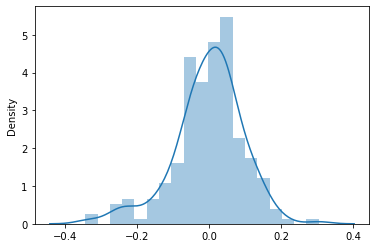

In [679]:
#residual analysys
res = y_test - y_pred
sns.distplot(res)

the erros seems to be normally distributed, however not so perfectly normal


In [680]:
y_train_pred = statmodel.predict(x_train_rfe)
y_train_pred

print(r2_score(y_pred,y_test))
print(r2_score(y_train_pred,y_train))


0.7769529761106078
0.8094856042239467


We see that the r-squared score is pretty close and we can assume the model is good

# conclusion



1. We see that year, Holidays, temprature, humidity, wind speed, seasons(summer , winter), months(july, sep), weatherSituation(mist/snow) are the variables which affets the count very much
2. wind speed and humidity affects negatively

The company should focus on making decision based on these parameters